# Box blur

In [1]:
import numpy as np
import cupy as cp
import cv2
import string
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import  animation

In [2]:
def load_kernel(src,kname):
    _ = cp.zeros((1,)) # 初始化cuda context
    kernel = cp.core.core.compile_with_cache(src).get_function(kname)
    return kernel
def load_kernel_file(fname,kname):
    sources = None
    with open(fname,encoding='utf-8') as f:
        sources = f.read()
    kernel = load_kernel(sources,kname)
    return kernel

In [3]:
d_boxfilter_x_tex = load_kernel_file('../../datas/cuda/01-box-blur.cu','d_boxfilter_x_tex')
d_boxfilter_y_global = load_kernel_file('../../datas/cuda/01-box-blur.cu','d_boxfilter_y_global')

In [4]:
src = cv2.imread('../../datas/f2.jpg',0)

In [5]:
rows,cols = src.shape[0],src.shape[1]
block = (32,32,1)
grid = (int(cols / block[0] ),int(rows / block[1]),1)

print('block = ',block)
print('grid = ',grid)


block =  (32, 32, 1)
grid =  (20, 15, 1)


In [6]:
src_cu = cp.asarray(src).astype(cp.float32)
temp_cu = cp.zeros(src.shape,dtype=cp.float32)
dst_cu = cp.zeros(src.shape,dtype=cp.float32)

In [9]:
d_boxfilter_x_tex(grid=grid,block=block,args=(src_cu,cp.int32(cols),cp.int32(rows),cp.int32(14)))
d_boxfilter_y_global(grid=grid,block=block,args=(src_cu,dst_cu,cp.int32(cols),cp.int32(rows),cp.int32(14)))

In [10]:
dst = dst_cu.get()
dst = np.uint8(np.abs(dst))
print(dst)

CUDARuntimeError: cudaErrorLaunchFailure: unspecified launch failure

([], <a list of 0 Text yticklabel objects>)

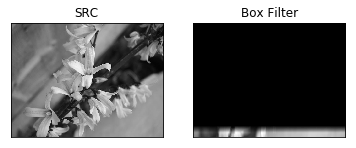

In [8]:
plt.subplot(121)
plt.imshow(src,'gray')
plt.title('SRC')
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(dst,'gray')
plt.title('Box Filter')
plt.xticks([])
plt.yticks([])